# Семинар №2 часть 2
## Выполнила: Пилипенко Елизавета
## Группа: ИДБ-22-13

#### Предсказать цены на машины (датасет cars.csv)

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

In [4]:
dataset_path = './data/cars.csv'

df = pd.read_csv(dataset_path)

In [5]:
df.sample(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
8991,28068,Ford,Kuga,Gasoline,Automatic,Used,22990.0,182.0,2017
14478,137800,Renault,Kangoo,Diesel,Manual,Used,9282.0,90.0,2017
27673,300,Opel,Corsa,Gasoline,Automatic,Used,18290.0,101.0,2020
26042,123500,Renault,Twingo,Gasoline,Manual,Used,2950.0,75.0,2013
34797,114000,Kia,NaN,Diesel,Manual,Used,4390.0,90.0,2011
38286,163000,Volkswagen,Golf Variant,Diesel,Manual,Used,7500.0,110.0,2014
23418,15,Skoda,Scala,Diesel,Manual,Pre-registered,19480.0,116.0,2019
6692,47999,smart,forTwo,Gasoline,Manual,Used,7499.0,71.0,2017
13208,29830,Ford,Fiesta,Gasoline,Manual,Used,9500.0,60.0,2017
12227,3,Toyota,Aygo,Gasoline,Automatic,Pre-registered,12790.0,73.0,2021


In [6]:
import pandas as pd
import numpy as np

def fill_na_custom(df_main: pd.DataFrame) -> pd.DataFrame:
    # Нужно получить датафрейм с NaN внутри
    df_nas = df_main[(df_main['model'].isna()) | (df_main['fuel'].isna()) | (df_main['gear'].isna())]
    # nas = na`s
    df_nas = df_nas.reset_index(drop=False)
    # print(df_nas.head())
    # print(df_nas.iloc[0]['index'])
    # print(df_nas.loc[df_nas.iloc[0]['index']])
    # print(df_nas.shape)
    # print(df_nas.duplicated().sum())
    # print(df_nas.isna().sum())

    count_of_updates = 0
    for index in range(df_nas.shape[0]):
        car = df_nas.iloc[index] # Присваиваем переменной массив с данными о текущей машине
        # print(pd.isna(car.fuel))
        ratio_by_atribute = { # Коэфициент для того, чтобы понимать нужно менять занчение или нет
            'model': 0,
            'fuel': 0,
            'gear': 0,
        }

        main_df_index = car['index']
        # print(main_df_index)
        
        if pd.isna(car.model):
            ratio_by_atribute['model'] = -1 # Изменяем значени атрибута

            # Фильтр по которому ищется значение
            # print(df['make'] == car.make)
            rule = (df['make'] == car.make) & (df['fuel'] == car.fuel) & (df['gear'] == car.gear) & (df['year'] == car.year) & (df['hp'] == car.hp) & (pd.notna(df['model'])) 
            new_model = df[rule]
            
            if not new_model.empty:  # Если нашлось, то меняем обратно коэф и заменяем в исходном df
                new_model = df[rule].iloc[0].model
                ratio_by_atribute['model'] = 0

                # print("Changed 1")
                df_main.at[main_df_index, 'model'] = new_model
                count_of_updates += 1
        
        if pd.isna(car.fuel):
            ratio_by_atribute['fuel'] = -1
            # print((df['make'] == car.make) & (df['model'] == car.model) & (df['year'] == car.year) & (pd.notna(df['fuel'])))
            rule = (df['make'] == car.make) & (df['model'] == car.model) & (df['year'] == car.year) & (pd.notna(df['fuel']))
            new_fuel = df[rule]
            # print(new_fuel) # Тут я выявил, что даже, если все параметры совпдают не факт, что машина на бензине оно и логично....
            
            if not new_fuel.empty:
                new_fuel = df[rule].iloc[0].fuel
                ratio_by_atribute['fuel'] = 0

                # print("Changed 2")
                df_main.at[main_df_index, 'fuel'] = new_fuel
                count_of_updates += 1
        
        if pd.isna(car.gear):
            # print("HEREEEEEEEEEEEEEEEEEEE")
            ratio_by_atribute['gear'] = -1
            rule = (df['make'] == car.make) & (df['model'] == car.model) & (df['year'] == car.year) & (pd.notna(df['gear']))
            new_gear = df[rule]
            # print(new_gear)
            
            if not new_gear.empty:
                new_gear = df[rule].iloc[0].gear
                # print("GEAR CHANGE")
                # print(main_df_index)
                # print(df_main.iloc[main_df_index])
                # print(df_main.iloc[main_df_index].gear)
                
                ratio_by_atribute['gear'] = 0

                # print("Changed 3")
                df_main.at[main_df_index, 'gear'] = new_gear
                count_of_updates += 1

        # Фильтр по менее строгому правилу
        for atribute, ratio in ratio_by_atribute.items():
            if ratio == -1:
                rule = (df['make'] == car.make) & (df['hp'] == car.hp) & (df['year'] == car.year) & (pd.notna(df[atribute]))
                new_value = df[rule]
                if not new_value.empty:
                    new_value = df[rule].iloc[0][atribute]
                    # print("Changed 4", main_df_index, atribute, new_value)
                    df_main.at[main_df_index, atribute] = new_value
                    # print(df_main.loc[main_df_index, atribute])
                    ratio_by_atribute[atribute] = 0
                    count_of_updates += 1

        # Фильтр по вообще не строгому правилу
        for atribute, ratio in ratio_by_atribute.items():

            if ratio == -1:
                rule = ((df['make'] == car.make) | (df['hp'] == car.hp) | (df['year'] == car.year) & (pd.notna(df[atribute])))
                new_value = df[rule]
                if not new_value.empty:
                    new_value = df[rule].iloc[0][atribute]
                    # print("Changed 5")
                    df_main.at[main_df_index, atribute] = new_value
                    count_of_updates += 1
        # print(df_main.isna().sum())
                
    print("Count of updates: " + str(count_of_updates))
    return df_main
    

def main(df: pd.DataFrame) -> pd.DataFrame:
    result = fill_na_custom(df)
    
    return result


df_not_filled = df
print('--------------------------')
print(df_not_filled.isna().sum())
sum_of_na_cars = df_not_filled.isna().model.sum() + df_not_filled.isna().fuel.sum() + df_not_filled.isna().gear.sum()
print("Count of na found cars: " + str(sum_of_na_cars))
print('--------------------------')
#print(df_not_filled.head())

# Test
#rule_nas = df.dropna()
#rule_nas.head()
#df.isna().sum()
#df_nas = df[rule_nas]
#df_nas.head()

# Main
df_new = main(df_not_filled)
print('--------------------------')
df_new.dropna(subset=['hp'], inplace=True)
print(df_new.isna().sum())
sum_of_not_changed = df_new.isna().model.sum() + df_new.isna().fuel.sum() + df_new.isna().gear.sum()
print("Count of not found parameters of cars: " + str(sum_of_not_changed))

--------------------------
mileage         0
make            0
model         143
fuel          247
gear          182
offerType       0
price        1533
hp             29
year            0
dtype: int64
Count of na found cars: 572
--------------------------
Count of updates: 572
--------------------------
mileage         0
make            0
model           0
fuel            0
gear            0
offerType       0
price        1532
hp              0
year            0
dtype: int64
Count of not found parameters of cars: 0


In [7]:
df_new.sample(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
25139,5170,Ford,Edge,Diesel,Automatic,Demonstration,46993.0,238.0,2020
8381,33520,Volkswagen,up!,Gasoline,Manual,Used,6990.0,60.0,2018
16883,27163,Audi,A6,Diesel,Automatic,Employee's car,55980.0,286.0,2020
20803,17416,Opel,Astra,Gasoline,Manual,Used,11660.0,101.0,2017
12770,50900,Volkswagen,Golf,Diesel,Manual,Used,13400.0,110.0,2015
42645,71207,Volkswagen,Tiguan,Diesel,Automatic,Used,24221.0,150.0,2018
23383,33801,Volkswagen,Golf,Gasoline,Manual,Used,16499.0,110.0,2018
30513,57000,Opel,Astra,Gasoline,Manual,Used,7999.0,140.0,2013
10162,58000,SEAT,Leon,Gasoline,Manual,Used,12290.0,140.0,2014
33416,12000,Mazda,CX-5,Gasoline,Automatic,Demonstration,36480.0,194.0,2020


In [8]:
print(df_new.shape, '\n\n', df_new.isna().sum())

(46376, 9) 

 mileage         0
make            0
model           0
fuel            0
gear            0
offerType       0
price        1532
hp              0
year            0
dtype: int64


In [9]:
# For testing
#df_cars_without_price = df_new[~pd.isna(df_new['price'])]
print(df_new['price'].max(), df_new['price'].min(), df_new['price'].max() - df_new['price'].min())

1199900.0 1100.0 1198800.0


In [10]:
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_squared_error


ratio_of_quantile = 0.90 # квантиль нужен для нахождения выбросов

# Main df - df_new

df_cars_without_price = df_new[pd.isna(df_new['price'])]
main_df = df_new[~pd.isna(df_new['price'])]

main_df['log_price'] = np.log(main_df['price'])
main_df = main_df[main_df['log_price'] < main_df['log_price'].quantile(ratio_of_quantile)]

# Расформировали данные на тренировочные и тестовые
features = main_df.drop(['price', 'log_price'], axis=1)
target = main_df['log_price']

# Нужно все категориальные данные преобразовать с помощью LabelEncoder, а потом оформатировать с помощью StandardScaler (можно простестить с MinMaxScaler)
label_encoder = OrdinalEncoder()
df_to_label_encode = ['make', 'model', 'fuel', 'gear', 'offerType']
features[df_to_label_encode] = label_encoder.fit_transform(features[df_to_label_encode])
# features['destination_city'].unique().size
#print(features)

# Юзаем StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(features)
features = standard_scaler.transform(features)
# print(features)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=50)

#DecisionTreeRegressor
param_grid_tree = {# [5, 10, 15, 16, 17, 18, 19, 26]
    'max_depth': [8, 12, 18, 20, 25],
    'min_samples_split': [85, 100],
    'min_samples_leaf': [2, 3, 4]
}

dt_model = DecisionTreeRegressor()
grid_search = GridSearchCV(dt_model, param_grid_tree, cv=7, scoring='neg_mean_squared_error')
grid_search.fit(features_train, target_train)

C:\Users\danil\AppData\Local\Temp\ipykernel_23348\719755607.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['log_price'] = np.log(main_df['price'])


GridSearchCV(cv=7, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [8, 12, 18, 20, 25],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [85, 100]},
             scoring='neg_mean_squared_error')

In [11]:
#DecisionTreeRegressor
print(len(features))
pred_lr_train_DTR = np.exp(grid_search.predict(features_train))
pred_lr_DTR = np.exp(grid_search.predict(features_test))

print('RMSE DTR:')

rmse_lr_train_DTR = mean_squared_error(np.exp(target_train), pred_lr_train_DTR) ** 0.5
rmse_lr_DTR = mean_squared_error(np.exp(target_test), pred_lr_DTR) ** 0.5

print('RMSE train DTR:', rmse_lr_train_DTR)
print('RMSE test DTR:', rmse_lr_DTR)
print('Difference of RMSE:', abs(rmse_lr_train_DTR - rmse_lr_DTR))
# print(pred_lr_DTR)

40355
RMSE DTR:
RMSE train DTR: 2113.181321500262
RMSE test DTR: 2328.273292699845
Difference of RMSE: 215.09197119958299


In [12]:
def format_features_for_pred(df):
    features = df.drop(['price'], axis=1)
    
    label_encoder = OrdinalEncoder()
    df_to_label_encode = ['make', 'model', 'fuel', 'gear', 'offerType']
    features[df_to_label_encode] = label_encoder.fit_transform(features[df_to_label_encode])

    standard_scaler = StandardScaler()
    standard_scaler.fit(features)
    features = standard_scaler.transform(features)

    return features

#print(df_cars_without_price)
formated_features = format_features_for_pred(df_cars_without_price)
pred_to_complete = np.exp(grid_search.predict(formated_features))
pred_to_complete = list(pred_to_complete)

df_cars_with_price = df_cars_without_price.reset_index(drop=True)
len_of_prices = len(pred_to_complete)
for index in range(len_of_prices):
    df_cars_with_price.loc[index, 'price'] = pred_to_complete[index]

df_cars_with_price.sample(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
1046,8119,SEAT,Leon,Gasoline,Manual,Used,17656.519672,131.0,2020
1306,128000,Opel,Astra,Diesel,Manual,Used,8896.484841,110.0,2015
457,149870,Skoda,Octavia,Diesel,Automatic,Used,8834.714988,150.0,2014
1336,83456,Opel,Combo,Diesel,Manual,Used,8064.481110,90.0,2016
740,7590,Kia,XCeed,Diesel,Manual,Demonstration,20466.095027,136.0,2020
1061,35990,Audi,A4,Gasoline,Automatic,Used,22144.367489,190.0,2018
1259,155000,Audi,A5,Diesel,Automatic,Used,13070.226698,245.0,2014
1094,135265,SEAT,Ibiza,Diesel,Manual,Used,4736.838726,75.0,2012
186,7150,SEAT,Mii,Electric,Automatic,Used,13778.638861,83.0,2020
1271,66860,Fiat,500,Gasoline,Manual,Used,7199.088564,69.0,2014


In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46376 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46376 non-null  int64  
 1   make       46376 non-null  object 
 2   model      46376 non-null  object 
 3   fuel       46376 non-null  object 
 4   gear       46376 non-null  object 
 5   offerType  46376 non-null  object 
 6   price      44844 non-null  float64
 7   hp         46376 non-null  float64
 8   year       46376 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 3.5+ MB


       mileage      fuel    gear offerType   price    hp
124     100870  Gasoline  Manual      Used  6445.0  60.0
126      65635  Gasoline  Manual      Used  6490.0  60.0
129      35093  Gasoline  Manual      Used  6750.0  60.0
925      49500  Gasoline  Manual      Used  6490.0  60.0
927      45200  Gasoline  Manual      Used  6490.0  60.0
...        ...       ...     ...       ...     ...   ...
41806    16500  Gasoline  Manual      Used  7085.0  60.0
41807    24200  Gasoline  Manual      Used  7085.0  60.0
41812    38544  Gasoline  Manual      Used  7480.0  60.0
41816    73770  Gasoline  Manual      Used  7740.0  60.0
41817    51879  Gasoline  Manual      Used  7780.0  60.0

[194 rows x 6 columns] 



      mileage      fuel    gear      offerType         price    hp
54      68500  Gasoline  Manual  Demonstration   8642.294215  60.0
268     23934  Gasoline  Manual           Used  10280.114550  60.0
290     35027  Gasoline  Manual           Used   8845.240903  60.0
497     69490  Gasol

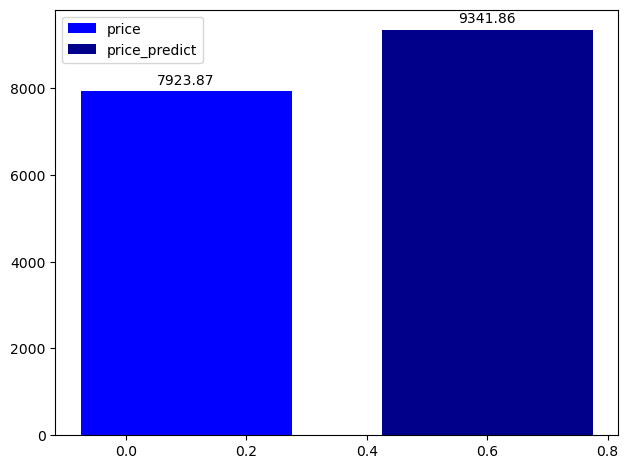

In [14]:
car_make = 'Volkswagen'
car_model = 'up!'
car_year = 2017

rule = (df_new['make'] == car_make) & (df_new['model'] == car_model) & (df_new['year'] == car_year)
rule_predict = (df_cars_with_price['make'] == car_make) & (df_cars_with_price['model'] == car_model) & (df_cars_with_price['year'] == car_year)

for_analise_1 = df_new[rule].drop(['make', 'model', 'year'], axis=1)
for_analise_2 = df_cars_with_price[rule_predict].drop(['make', 'model', 'year'], axis=1)
print(for_analise_1, '\n\n\n')
print(for_analise_2)

fig, ax = plt.subplots()
width = 0.35 
rect1 = ax.bar(width-0.25, for_analise_1['price'].mean(), width, label='price', color='blue')
rect2 = ax.bar(width+0.25, for_analise_2['price'].mean(), width, label='price_predict', color='darkblue')
# ax.set_xticks(x)
#ax.set_xticklabels(df.Пол)
ax.legend()
ax.bar_label(rect1, padding=3)
ax.bar_label(rect2, padding=3)
fig.tight_layout()

print('\n\nDifference of price:', for_analise_1['price'].mean() - for_analise_2['price'].mean())

In [1]:
conclusion = '''
Нейронка туповата, но что-то предсказывает, rmse низкий, по логике прослеживается, то есть там, где больше пробег, там цена ниже, где-то попадает,
но я не очень довольна, но границ для сдачи не было, надеюсь норм

Случайно оказалось то, что она не везде туповата, сначала протестила на данных с каким-то мерсом, на данных с ауди получилось повторить сильный промах
(Audi, Q3, 2018)
'''

print(conclusion)


Нейронка туповата, но что-то предсказывает, rmse низкий, по логике прослеживается, то есть там, где больше пробег, там цена ниже, где-то попадает,
но я не очень довольна, но границ для сдачи не было, надеюсь норм

Случайно оказалось то, что она не везде туповата, сначала протестила на данных с каким-то мерсом, на данных с ауди получилось повторить сильный промах
(Audi, Q3, 2018)

